# Project: Wrangling and Analyze Data

## Data Gathering

In [3]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json

In [4]:
# Import twitter archive csv file into pandas dataframe
tweets_df = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
#Download tweet image precdiction using request library
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)
response

<Response [200]>

In [7]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [8]:
# Import image prediction tsv file into pandas dataframe
dog_stage_df = pd.read_csv('image-predictions.tsv', sep ='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
# Dictionary list to read tweet's JSON data
df_list = [] 
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        tweet_json = json.loads(line)
        
        # Append to dictionary list
        df_list.append({'id': tweet_json['id'],
                        'retweet_count': tweet_json['retweet_count'],
                        'favorite_count': tweet_json['favorite_count'],
                        'about_dog': tweet_json['full_text'],
                        'display_text_range': tweet_json['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count, full_text and display_text_range
tweet_json_df = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count', 'about_dog', 'display_text_range'])

## Assessing Data

In [8]:
tweets_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1652,683481228088049664,NaN,NaN,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,None,None,pupper,None
1145,727175381690781696,NaN,NaN,2016-05-02 16:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karll. He just wants to go kayaking. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727175381...,10,10,Karll,None,None,None,None
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
331,832998151111966721,NaN,NaN,2017-02-18 17:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo,None,None,None


In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
tweets_df.name.str.islower()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2356, dtype: bool

In [11]:
tweets_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [12]:
dog_stage_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,otter,0.945537,False,mink,0.018231,False,sea_lion,0.015861,False
523,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,Boston_bull,0.976577,True,French_bulldog,0.014324,True,Chihuahua,0.002302,True
1415,771102124360998913,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg,1,Labrador_retriever,0.568789,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True
247,670668383499735048,https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg,1,banana,0.107317,False,orange,0.099662,False,bagel,0.089033,False


In [13]:
dog_stage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_json_df.sample(5)

,id,retweet_count,favorite_count,about_dog,display_text_range
1195,717009362452090881,1102,3583,This is Smokey. He's having some sort of exist...,"[0, 111]"
521,809808892968534016,5711,0,RT @dog_rates: This is Maximus. His face is st...,"[0, 140]"
199,854010172552949760,3433,17169,"At first I thought this was a shy doggo, but i...","[0, 140]"
397,825026590719483904,1483,7020,Say hello to Pablo. He's one gorgeous puppo. A...,"[0, 140]"
2060,671163268581498880,1198,1763,Pack of horned dogs here. Very team-oriented b...,"[0, 137]"


In [15]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   about_dog           2354 non-null   object
 4   display_text_range  2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


### Quality issues
#### tweets_df table
1.Inconsistency in reperesentation of missing values; None and Null

2.Erroneous dog names with lowercase characters

3.text column contains untruncated text instead of displayable text

4.tweet id is represented as __id__ in tweet_json_df table, which is not consistent with other tables

5.Missing records in dog_stage_clean table; 2075 instead of 2356

6.html tags in __source__ column

7.Retweets are duplicates of tweets

8.Missig values in __expanded_urls__

9.Timestamp column is __str__ instead of __datetime__

10."rating_denominator" values other than 10
#### dog_stage_df table

11.Records with more than one dog stage


### Tidiness issues
1.__doggo, floofer, pupper and puppo__ columns are all about kind of dogs

2.columns __p1, p1_dog, p1_conf__ should be two columns;breed and confidence

3.Only one table is required, since all the three tables are all about one observational unit

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [333]:
# Make copies of original pieces of data
tweets_clean =tweets_df.copy()
dog_stage_clean = dog_stage_df.copy()
tweet_json_clean =tweet_json_df.copy()

## Quality

### 1. Inconsistency in reperesentation of missing values; None and Null:

#### Define: Replace 'None' with NaN in tweets_clean table

#### Code

In [334]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']
for col in col_list:
    tweets_clean[col] =tweets_clean[col].replace({'None': np.nan, 'nan':np.nan})

#### Test

In [335]:
tweets_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
404,824025158776213504,NaN,NaN,2017-01-24 22:44:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I wish we were dogs"" 14/10 for @BadlandsNPS h...",NaN,NaN,NaN,https://twitter.com/badlandsnps/status/8239662...,14,10,None,NaN,NaN,NaN,NaN
1994,672604026190569472,NaN,NaN,2015-12-04 02:31:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672604026...,11,10,a,NaN,NaN,NaN,NaN
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,NaN,NaN,NaN,NaN
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN
1203,716285507865542656,NaN,NaN,2016-04-02 15:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephanus. She stays woke. 12/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716285507...,12,10,Stephanus,NaN,NaN,NaN,NaN


### 2. Erroneous dog names with lowercase characters

#### Define: Replace erroneous names with np.nan

#### Code

In [336]:
tweets_clean[tweets_clean.name.str.islower()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [337]:
tweets_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space', 'None'], np.nan, inplace =True)


#### Test

In [338]:
tweets_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

### 3. 'text' column contains untruncated text instead of displayable text

#### Define: Extract the correct rating from text and remove rating & links.

#### Code

In [339]:
tweets_clean[tweets_clean.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator']]
extracted_ratings = tweets_clean[tweets_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]['text'].str.extract(r'(\d+\.\d*\/\d+)')

C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\927609713.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweets_clean[tweets_clean.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator']]
C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\927609713.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  extracted_ratings = tweets_clean[tweets_clean.text.str.contains(r'(\d+\.\d*\/\d+)')]['text'].str.extract(r'(\d+\.\d*\/\d+)')


In [340]:
tweets_clean.loc[extracted_ratings.index, 'rating_numerator'] = extracted_ratings.values

In [341]:
# Convert rating_numerator datatype to float
tweets_clean['rating_numerator'] =pd.to_numeric(tweets_clean['rating_numerator'], errors='coerce')
tweets_clean.loc[extracted_ratings.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,NaN,10,Bella,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,NaN,10,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,NaN,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,NaN,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,NaN,10,NaN,NaN,NaN,NaN,NaN


In [342]:
#Remove rating and links from text
tweets_clean['text'] = tweets_clean['text'].str.extract('(.+(?=\s\d+/\d+\s))')

#### Test

In [343]:
tweets_clean.text.sample(5)

2086    I would do radical things in the name of Dog G...
1390    If a pupper gave that to me I'd probably start...
93      I can't believe this keeps happening. This, is...
2346    Here is the Rand Paul of retrievers folks! He'...
993     This is one of the most reckless puppers I've ...
Name: text, dtype: object

### 4. tweet_id is represented as id in tweet_json_clean table, which is not consistent with other tables

#### Define: Convert id in tweet_json_clean to tweet_id

##### Code

In [344]:
tweet_json_clean = tweet_json_clean.rename(columns={ 'id': 'tweet_id'})

#### Test

In [345]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   about_dog           2354 non-null   object
 4   display_text_range  2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


### 5. Missing records in dog_stage_clean table; 2075 instead of 2356

#### Define:Select tweet_ids in tweets_clean which are also in dog_stage_clean

#### Code

In [346]:
tweets_clean = tweets_clean[tweets_clean.tweet_id.isin(dog_stage_clean.tweet_id)]

#### Test

In [347]:
assert len(tweets_clean.tweet_id) == len(dog_stage_clean.tweet_id)

### 6. html tags in source column

#### Define: Extract only the text between html tags and convert the datatype to categorical

#### Code

In [348]:
tweets_clean.source = tweets_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\302599527.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_clean.source = tweets_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


In [349]:
tweets_clean.source = tweets_clean.source.astype('category')

#### Test

In [350]:
tweets_clean.source.value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### 7. Retweets are duplicates of tweets

#### Define: Take tweets with original tweets and drop those with retweets

#### Code

In [351]:
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()]

In [352]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1994 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   1994 non-null   object  
 4   source                      1994 non-null   category
 5   text                        1924 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1994 non-null   object  
 10  rating_numerator            1990 non-null   float64 
 11  rating_denominator          1994 non-null   int64   
 12  name                        1350 non-null   object  
 13  doggo             

In [353]:
#Remove all columns related to retweets & replies
tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis =1, inplace =True)

#### Test

In [354]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   int64   
 1   timestamp           1994 non-null   object  
 2   source              1994 non-null   category
 3   text                1924 non-null   object  
 4   expanded_urls       1994 non-null   object  
 5   rating_numerator    1990 non-null   float64 
 6   rating_denominator  1994 non-null   int64   
 7   name                1350 non-null   object  
 8   doggo               74 non-null     object  
 9   floofer             8 non-null      object  
 10  pupper              212 non-null    object  
 11  puppo               23 non-null     object  
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 189.0+ KB


### 8. Missig values in expanded_urls

#### Define: Drop rows with missing values in expanded_url

#### Code

In [355]:
tweets_clean =tweets_clean[tweets_clean['expanded_urls'].notna()]

#### Test

In [356]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1994 non-null   int64   
 1   timestamp           1994 non-null   object  
 2   source              1994 non-null   category
 3   text                1924 non-null   object  
 4   expanded_urls       1994 non-null   object  
 5   rating_numerator    1990 non-null   float64 
 6   rating_denominator  1994 non-null   int64   
 7   name                1350 non-null   object  
 8   doggo               74 non-null     object  
 9   floofer             8 non-null      object  
 10  pupper              212 non-null    object  
 11  puppo               23 non-null     object  
dtypes: category(1), float64(1), int64(2), object(8)
memory usage: 189.0+ KB


### 9. Timestamp column is str instead of datetime

#### Define:Convert timestamp to datetime data type

#### Code

In [357]:
tweets_clean.timestamp = pd.to_datetime(tweets_clean.timestamp)

#### Test

In [358]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1924 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1990 non-null   float64            
 6   rating_denominator  1994 non-null   int64              
 7   name                1350 non-null   object             
 8   doggo               74 non-null     object             
 9   floofer             8 non-null      object             
 10  pupper              212 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

### "rating_denominator" other than 10

#### Define: Change values of rating_denominator other than 10 to 10

#### Code

In [359]:
tweets_clean['rating_denominator'][(tweets_clean['rating_denominator'] != 10)] = 10

C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\1142746877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean['rating_denominator'][(tweets_clean['rating_denominator'] != 10)] = 10


#### Test

In [360]:
tweets_clean.rating_denominator.unique()

array([10], dtype=int64)

### 11. Records with more than one dog stage

In [361]:
doggo_floofer = tweets_clean[(tweets_clean['doggo'] == 'doggo') & (tweets_clean['floofer'] == 'floofer')]
doggo_floofer

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,NaN,doggo,floofer,NaN,NaN


In [362]:
doggo_pupper = tweets_clean[(tweets_clean['doggo'] == 'doggo') & (tweets_clean['pupper'] == 'pupper')]
doggo_pupper

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both",https://twitter.com/dog_rates/status/802265048...,11.0,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,NaN,pupper,NaN
889,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,NaN,doggo,NaN,pupper,NaN
1063,741067306818797568,2016-06-10 00:39:48+00:00,Twitter for iPhone,This is just downright precious af.,https://twitter.com/dog_rates/status/741067306...,12.0,10,NaN,doggo,NaN,pupper,NaN
1113,733109485275860992,2016-05-19 01:38:16+00:00,Twitter for iPhone,"Like father (doggo), like son (pupper). Both",https://twitter.com/dog_rates/status/733109485...,12.0,10,NaN,doggo,NaN,pupper,NaN


In [363]:
doggo_puppo = tweets_clean[(tweets_clean['doggo'] == 'doggo') & (tweets_clean['puppo'] == 'puppo')]
doggo_puppo

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,NaN,doggo,NaN,NaN,puppo


There are 9 records with doggo and pupper, 1 record with doggo and floofer and 1 record with doggo and puppo

#### Define: Set rows with more than one dog stage to NaN

#### Code

In [364]:
# Select only floofer and set doggo to NaN where both appeared
tweets_clean['doggo'][(tweets_clean['doggo'] == 'doggo') & (tweets_clean['floofer'] == 'floofer')] = np.nan

C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\609926286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean['doggo'][(tweets_clean['doggo'] == 'doggo') & (tweets_clean['floofer'] == 'floofer')] = np.nan


In [365]:
# Select only doggo and set pupper to NaN where both appeared
tweets_clean['pupper'][(tweets_clean['doggo'] == 'doggo') & (tweets_clean['pupper'] == 'pupper')] = np.nan

C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\2474794037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean['pupper'][(tweets_clean['doggo'] == 'doggo') & (tweets_clean['pupper'] == 'pupper')] = np.nan


In [366]:
# Select only puppo and set doggo to NaN where both appeared
tweets_clean['doggo'][(tweets_clean['doggo'] == 'doggo') & (tweets_clean['puppo'] == 'puppo')] = np.nan

C:\Users\muazz\AppData\Local\Temp\ipykernel_8800\1442190803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_clean['doggo'][(tweets_clean['doggo'] == 'doggo') & (tweets_clean['puppo'] == 'puppo')] = np.nan


#### Test

In [367]:
doggo_floofer = tweets_clean[(tweets_clean['doggo'] == 'doggo') & (tweets_clean['floofer'] == 'floofer')]
doggo_floofer

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [368]:
doggo_pupper = tweets_clean[(tweets_clean['doggo'] == 'doggo') & (tweets_clean['pupper'] == 'pupper')]
doggo_pupper

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [369]:
doggo_puppo = tweets_clean[(tweets_clean['doggo'] == 'doggo') & (tweets_clean['puppo'] == 'puppo')]
doggo_puppo

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Tidiness

### 1. doggo, floofer, pupper and puppo columns are all about kind of dogs

#### Define: Merge the columns 'doggo', 'floofer', 'pupper' and 'puppo' into one colum 'dog_stage

#### Code

In [370]:
# Create a column "dog_stage" and collapse 'doggo', 'floofer', 'pupper', 'puppo' into it.
cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweets_clean['dog_stage'] = tweets_clean[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

In [371]:
#Replace empty strings with nan and convert to datatype 'category'
tweets_clean['dog_stage'] = tweets_clean['dog_stage'].replace('', np.nan).astype('category')

In [372]:
# Drop 'doggo', 'floofer', 'pupper', 'puppo' from tweets_clean table
tweets_clean.drop(columns = cols, axis=1, inplace =True)

#### Test

In [373]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1924 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1990 non-null   float64            
 6   rating_denominator  1994 non-null   int64              
 7   name                1350 non-null   object             
 8   dog_stage           306 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 128.8+ KB


In [374]:
tweets_clean.dog_stage.unique()

[NaN, 'doggo', 'puppo', 'pupper', 'floofer']
Categories (4, object): ['doggo', 'floofer', 'pupper', 'puppo']

### 2. columns p1, p1_dog, p1_conf should be two columns;breed and confidence

#### Define: Create columns 'breed_dog' and 'confidence_breed' and choose predictions with highest confidence

#### Code

In [375]:
# Drop column "img_num" from dog_stage_clean
dog_stage_clean.drop('img_num', axis =1, inplace =True)

In [378]:
#Create columns confidence_breed and breed_dog
confidence_breed =[]
breed_dog =[]
# Create a for loop to iterate over predictions & confidence and select the one with highest confidence
for index, row in dog_stage_clean.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed_dog.append(row['p1'])
        confidence_breed.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed_dog.append(row['p2'])
        confidence_breed.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed_dog.append(row['p3'])
        confidence_breed.append(row['p3_conf'])
    else:
        breed_dog.append(np.nan)
        confidence_breed.append(np.nan)
dog_stage_clean['confidence'] = confidence_breed
dog_stage_clean['breed'] = breed_dog

In [380]:
dog_stage_clean =dog_stage_clean[['tweet_id', 'jpg_url', 'breed', 'confidence']]

#### Test

In [381]:
dog_stage_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


In [382]:
dog_stage_clean.sample(5)

,tweet_id,jpg_url,breed,confidence
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,malamute,0.088530
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,boxer,0.826272
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,basset,0.605437
1794,831309418084069378,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,Doberman,0.369389
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,Labrador_retriever,0.739170


### 3. Only one table is required, since all the three tables are all about one observational unit

#### Define: Select required columns from 'tweet_json_clean' and merge the three tables (tweets_clean, dog_stage_clean and tweet_json_clean)

#### Code

In [384]:
# Select required columns from tweet_json_clean
tweet_json_clean = tweet_json_clean[['tweet_id', 'retweet_count', 'favorite_count']]

In [386]:
# Merge the three tables into one table;twiter_archive_master
df = pd.merge(tweets_clean,dog_stage_clean, on ='tweet_id')
twiter_archive_master = pd.merge(df,tweet_json_clean, on ='tweet_id')

#### Test

In [389]:
twiter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   category           
 3   text                1924 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1990 non-null   float64            
 6   rating_denominator  1994 non-null   int64              
 7   name                1350 non-null   object             
 8   dog_stage           306 non-null    category           
 9   jpg_url             1994 non-null   object             
 10  breed               1477 non-null   object             
 11  confidence          1477 non-null   float64            
 12  retweet_count       1994 non-null 

## Storing Data

In [391]:
# Store wrangled and cleaned data into a csv file named 'twitter_archive_master.csv'
twiter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

### Sources of tweets

In [411]:
tweets_source =twiter_archive_master['source'].value_counts()
tweets_source

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Ratings distribution

In [394]:
twiter_archive_master['rating_numerator'].value_counts().sort_index()

0.0         2
1.0         5
2.0         9
3.0        19
4.0        16
5.0        32
6.0        32
7.0        52
8.0        95
9.0       151
10.0      419
11.0      396
12.0      450
13.0      261
14.0       35
24.0        1
44.0        1
45.0        1
50.0        1
60.0        1
80.0        1
84.0        1
88.0        1
99.0        1
121.0       1
143.0       1
144.0       1
165.0       1
204.0       1
420.0       1
1776.0      1
Name: rating_numerator, dtype: int64

In [400]:
Ratings =twiter_archive_master['rating_numerator'][twiter_archive_master['rating_numerator'] > 10].value_counts().sum()

In [401]:
Total_rating =twiter_archive_master['rating_numerator'].value_counts().sum()

In [403]:
Rating_above_ten =Ratings/Total_rating
Rating_above_ten

0.5819095477386935

### Top 10 names of dogs

In [431]:
twiter_archive_master['name'].value_counts().sort_index()

Abby     2
Ace      1
Acro     1
Adele    1
Aiden    1
        ..
Ziva     1
Zoe      1
Zoey     3
Zooey    1
Zuzu     1
Name: name, Length: 913, dtype: int64

In [430]:
twiter_archive_master.name.value_counts()[1:11]

Cooper     10
Lucy       10
Oliver     10
Penny       9
Tucker      9
Winston     8
Sadie       8
Toby        7
Lola        7
Daisy       7
Name: name, dtype: int64

### Tweeting trends over time

In [435]:
trend = twiter_archive_master.tweet_id.groupby([twiter_archive_master['timestamp'].dt.year, twiter_archive_master['timestamp'].dt.month]).count()
trend

timestamp  timestamp
2015       11           296
           12           367
2016       1            169
           2            111
           3            120
           4             54
           5             57
           6             81
           7             88
           8             59
           9             63
           10            65
           11            53
           12            54
2017       1             66
           2             64
           3             48
           4             41
           5             43
           6             44
           7             49
           8              2
Name: tweet_id, dtype: int64

### Top 10 dog breeds as predicted by image prediction

In [451]:
twiter_archive_master.breed.nunique()

111

In [436]:
twiter_archive_master.breed.value_counts()[1:11]

Labrador_retriever    95
Pembroke              88
Chihuahua             79
pug                   54
chow                  41
Samoyed               40
toy_poodle            38
Pomeranian            38
malamute              29
cocker_spaniel        27
Name: breed, dtype: int64

### Insights:
1.The highest source of tweets is iPhone.

2.Most dogs were rated between 10 and 13.

3.The most common names of dogs are Cooper, Lucy and Oliver among others.

4.The number of tweets reduced drastically over time.

5.Labrador Retriever,an American most popular breed, was the top predicted breed.

### Visualization

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Tweets Source Distribution

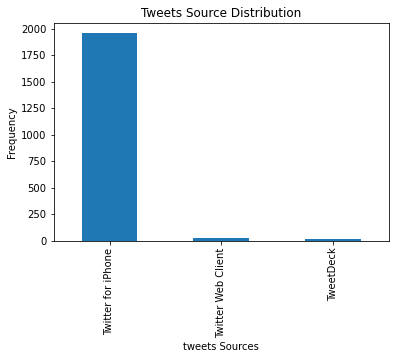

In [453]:
ax =tweets_source.plot.bar(x= 'source', y ='tweets_source.values')
ax.set(xlabel ='tweets Sources', ylabel ='Frequency', title ='Tweets Source Distribution');
plt.savefig('source_distribution.png')

### Dogs Rating Distrubtion

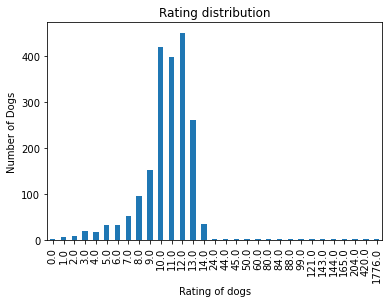

In [454]:
ax = twiter_archive_master.rating_numerator.value_counts().sort_index().plot(kind ='bar', title = 'Rating distribution')
ax.set_xlabel('Rating of dogs')
ax.set_ylabel('Number of Dogs')
plt.savefig('rating_distribution.png')

### Top 10 common dog names

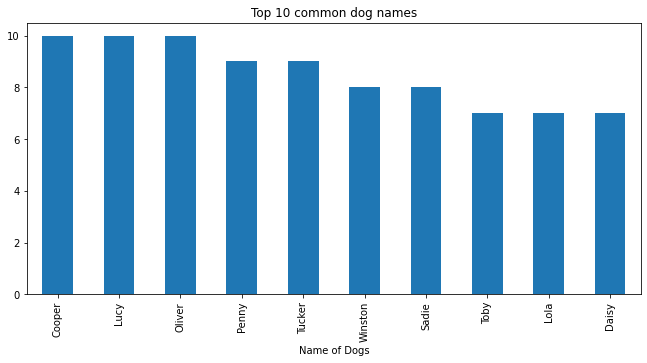

In [458]:
twiter_archive_master.name.value_counts()[1:11].plot(kind ='bar', figsize=(11,5), title='Top 10 common dog names').set_xlabel('Name of Dogs')
plt.savefig('dog_names_predicted.png')

### Trends of tweets over time

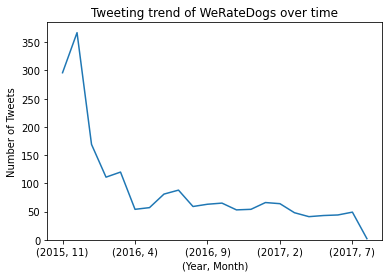

In [456]:
trend = twiter_archive_master.tweet_id.groupby([twiter_archive_master["timestamp"].dt.year, twiter_archive_master["timestamp"].dt.month]).count()
ax = trend.plot(kind ='line', title='Tweeting trend of WeRateDogs over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('trend_tweet.png')

### Top 10 dog breeds as predicted by image prediction

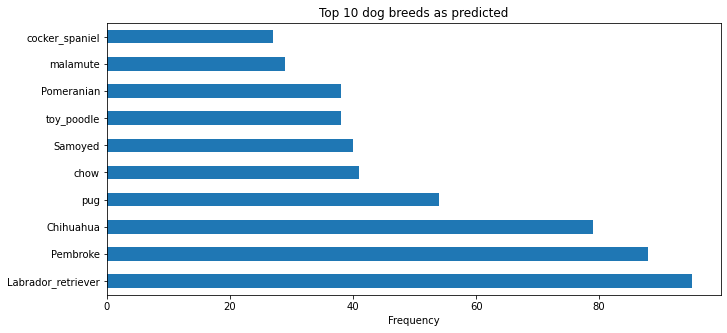

In [459]:
twiter_archive_master.breed.value_counts()[1:11].plot(kind ='barh', figsize=(11,5), title='Top 10 dog breeds as predicted').set_xlabel("Frequency")
plt.savefig('dog_breed_predicted.png')